In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("loan_prediction.csv")   
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

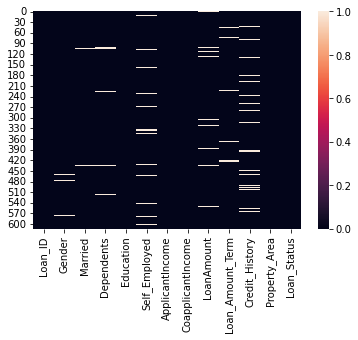

In [6]:
sns.heatmap(df.isnull())

From above we can see that there are Null Values present in columns : - Gender, Married, Dependents, Self_Employed, LoanAmount , Loan_Amount_Term & Credit_History.

We will Treat these Null values later.

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:>

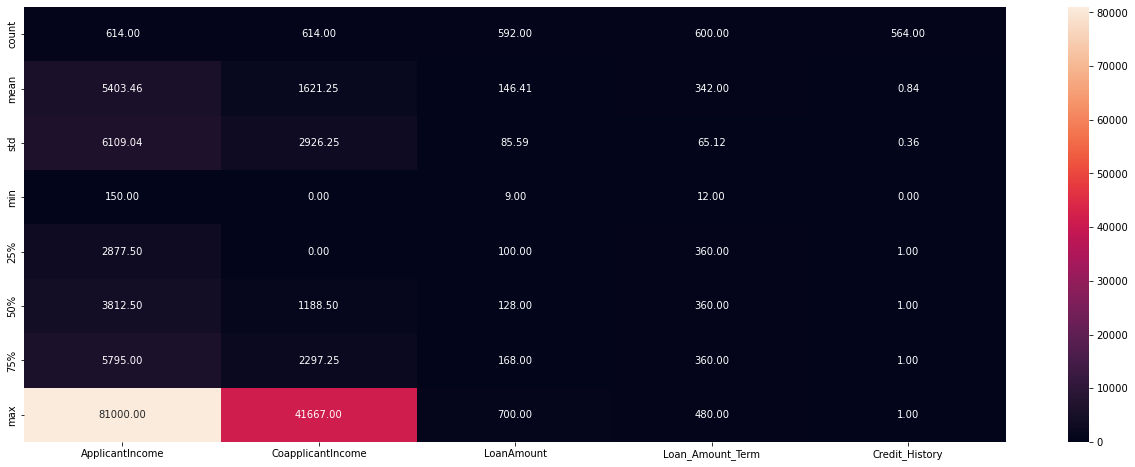

In [8]:
plt.figure(figsize=(22,8))
sns.heatmap(df.describe(),annot=True,fmt="0.2f")

Important Observations from above:-

   1. Mean > Median for ApplicantIncome, CoapplicantIncome & LoanAmount that means these columns are Right Skewed.
   3. Also, ApplicantIncome, CoapplicantIncome & LoanAmount have large gap b/w 75th percentile & max. value which means outliers are present in the data.

# Exploratory Data Analysis & Visualization

UNIVARIATE ANALYSIS

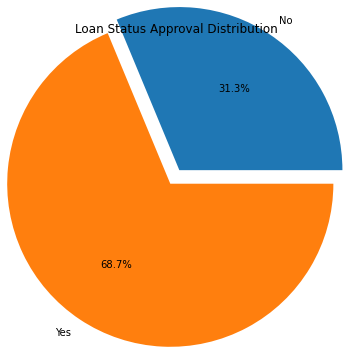

Y    422
N    192
Name: Loan_Status, dtype: int64


In [9]:
at = df.groupby('Loan_Status')['Loan_Status'].count()
plt.figure(figsize=(10,5))
plt.pie(at, labels=['No', 'Yes'], explode=[0.05, 0.1], radius=1.5, autopct='%1.1f%%')
plt.title("Loan Status Approval Distribution")
plt.show()
print(df['Loan_Status'].value_counts())

From above we can see that almost 68.7% of Appicants get Approval of the Loans whereas 31.3% applicants are rejected.

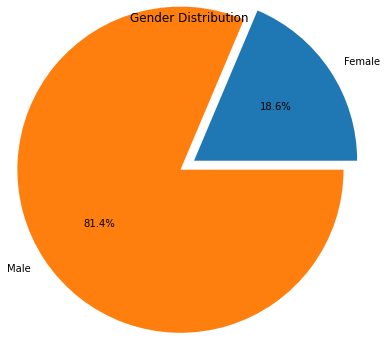

Male      489
Female    112
Name: Gender, dtype: int64


In [10]:
at = df.groupby('Gender')['Gender'].count()
plt.figure(figsize=(10,5))
plt.pie(at, labels=['Female','Male'], explode=[0.05, 0.1], radius=1.5, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()
print(df['Gender'].value_counts())

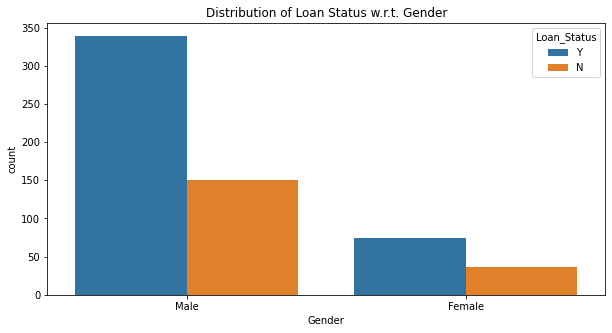

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',hue='Loan_Status',data=df)
plt.title("Distribution of Loan Status w.r.t. Gender")
plt.show()

We can see that almost 81.4 % of people applying for Loans in the Banks are Males while only 18.6 % of people are Females.

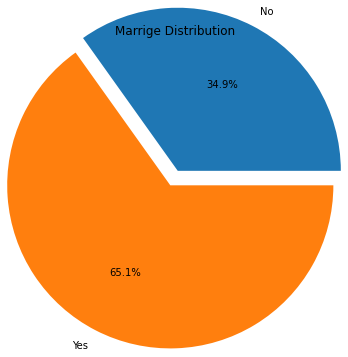

Yes    398
No     213
Name: Married, dtype: int64


In [12]:
at = df.groupby('Married')['Married'].count()
plt.figure(figsize=(10,5))
plt.pie(at, labels=['No','Yes'], explode=[0.05, 0.1], radius=1.5, autopct='%1.1f%%')
plt.title("Marrige Distribution")
plt.show()
print(df['Married'].value_counts())

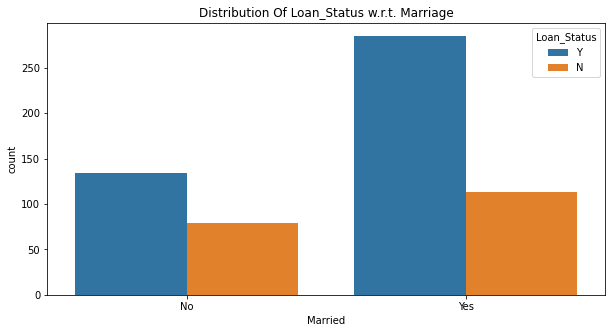

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='Married',hue='Loan_Status',data=df)
plt.title("Distribution Of Loan_Status w.r.t. Marriage")
plt.show()

OBSERVATIONS:- 
   1. Out of all applicants 65.1 % of people are married whereas 34.9% of applicants are unmarried.
   2. Also, Married people are more likely to get the Loan Approval.

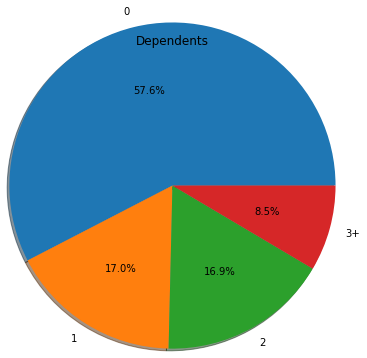

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [14]:
lb = df['Dependents'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5,shadow=True, autopct='%1.1f%%')
plt.title("Dependents")
plt.show()
print(df['Dependents'].value_counts())

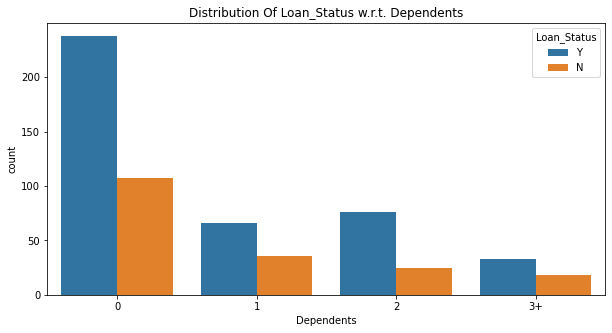

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='Dependents',hue='Loan_Status',data=df)
plt.title("Distribution Of Loan_Status w.r.t. Dependents")
plt.show()

OBSERVATIONS:-
   1. Among all the applicants for loan, majority of applicants i.e. 57.6 % have No dependent, 17% each for 1 & 2 dependents. Whereas only 8.5% of people have 3 or more dependents with them. 
   2. Applicants with 0 dependents are more likely to Get Approval. Out of people with 1 or 2 dependents applicants with 2 dependents are more likely to get the Loan Approval. Whereas people with 3+ dependents are least likely to get the approval for the loan.

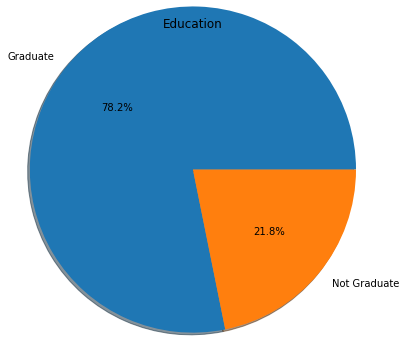

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


In [16]:
lb = df['Education'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5,shadow=True, autopct='%1.1f%%')
plt.title("Education")
plt.show()
print(df['Education'].value_counts())

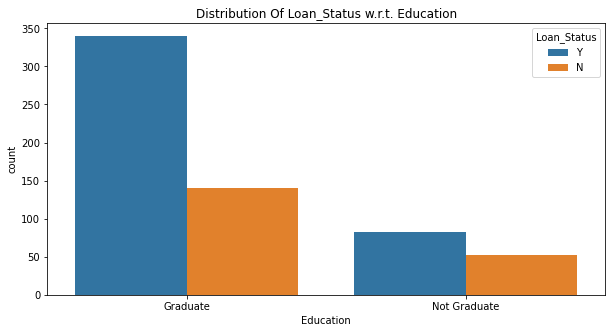

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='Education',hue='Loan_Status',data=df)
plt.title("Distribution Of Loan_Status w.r.t. Education")
plt.show()

OBSERVATIONS:-

   1. 78.2 % of people applying for loan are Graduate while the rest are Not Graduate. 
   2. Graduate People are more likely to get the Loan approval than the people who are not graduated.

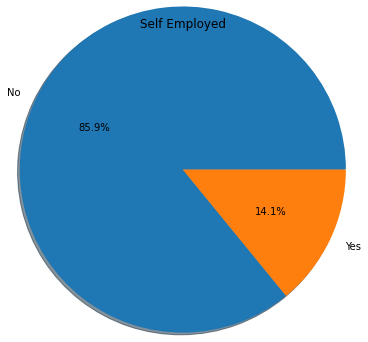

No     500
Yes     82
Name: Self_Employed, dtype: int64


In [18]:
lb = df['Self_Employed'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5,shadow=True, autopct='%1.1f%%')
plt.title("Self Employed")
plt.show()
print(df['Self_Employed'].value_counts())

Only 14.1% of the people that are applying for Loan are Self_employed.

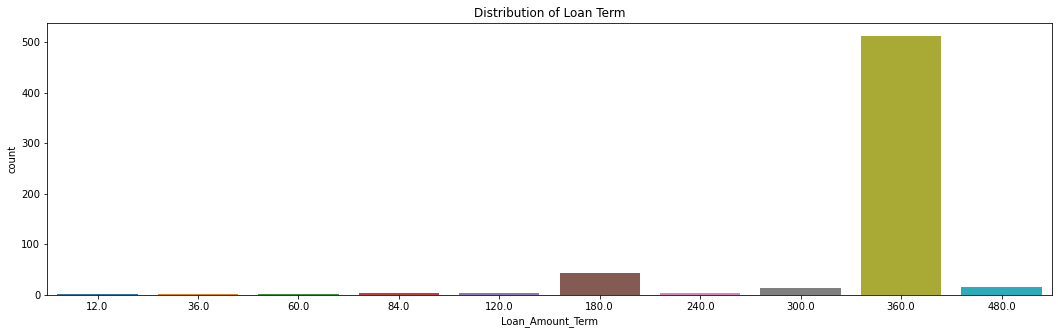

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [19]:
plt.figure(figsize=(18,5))
sns.countplot(x='Loan_Amount_Term',data=df)
plt.title("Distribution of Loan Term")
plt.show()
print(df['Loan_Amount_Term'].value_counts())

We can see that Majority of Applicants are taking loan for 360 months tenure.

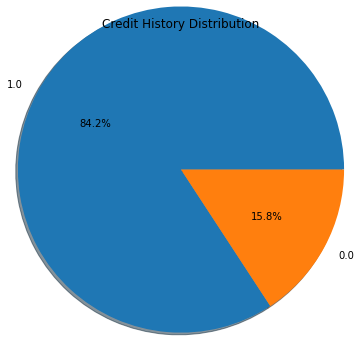

1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [20]:
lb = df['Credit_History'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5,shadow=True, autopct='%1.1f%%')
plt.title("Credit History Distribution")
plt.show()
print(df['Credit_History'].value_counts())

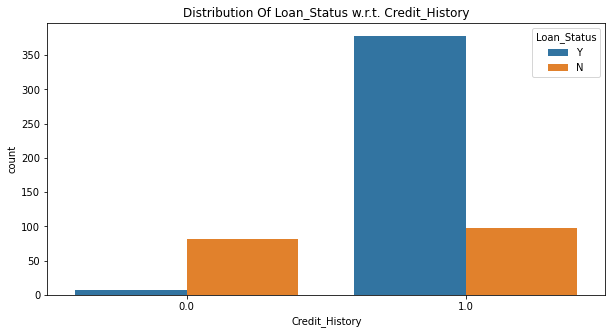

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)
plt.title("Distribution Of Loan_Status w.r.t. Credit_History")
plt.show()

OBSERVATIONS:-
   
   1. Almost 84% of people have +ve credit history with the bank whereas 16% of them are defaulters. 
   2. Also, we can clearly see that the people who are defaulters do not get the Loan Approval easily.

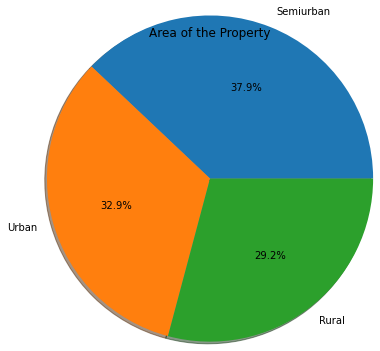

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [22]:
lb = df['Property_Area'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5,shadow=True, autopct='%1.1f%%')
plt.title("Area of the Property")
plt.show()
print(df['Property_Area'].value_counts())

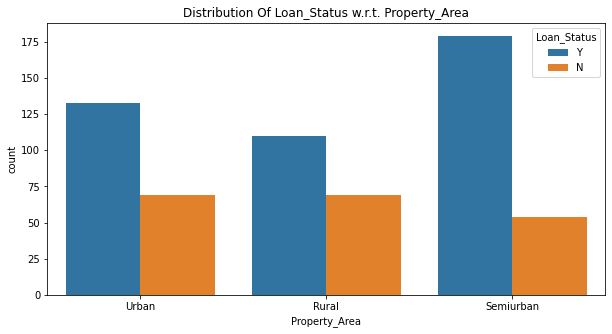

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)
plt.title("Distribution Of Loan_Status w.r.t. Property_Area")
plt.show()

OBSERVATIONS:-

   1. We can see that almost equal number of people from all three areas are applying for the loans. Where Peoples from Semi-urban area are applying for loans are little bit higher than the other areas. 
   2.  People having property in Semi-urban area are most likely to get the Loan Approval. Whereas applicants having properties in Rural area are least likely to get the Loan Approval. 

DISTRIBUTION PLOT

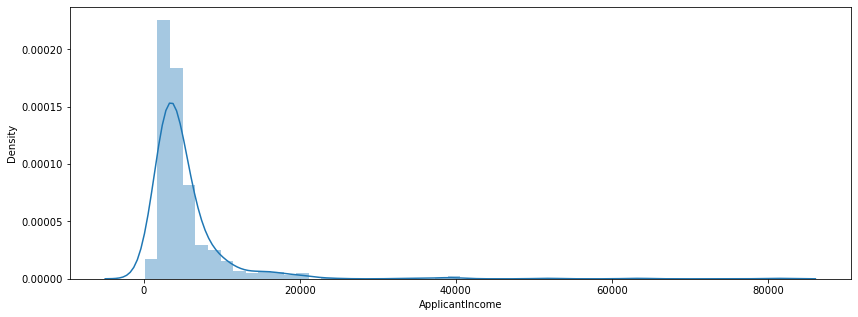

In [24]:
plt.figure(figsize=(14,5))
sns.distplot(df['ApplicantIncome'])
plt.show()

OBSERVATIONS: - 
   1. The data is high +ve skewed.
   2. Also, mean Income of the applicants is b/w 5000-6000.

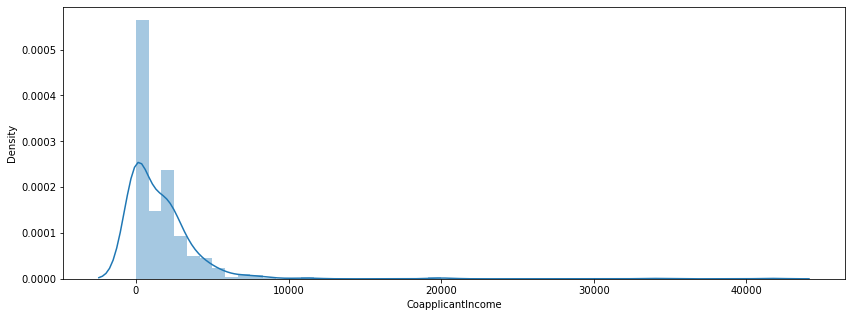

In [25]:
plt.figure(figsize=(14,5))
sns.distplot(df['CoapplicantIncome'])
plt.show()

OBSERVATIONS: -

   1. The data is high +ve skewed.
   2. Also, mean Income of the Co-applicants is b/w 1500-2000.

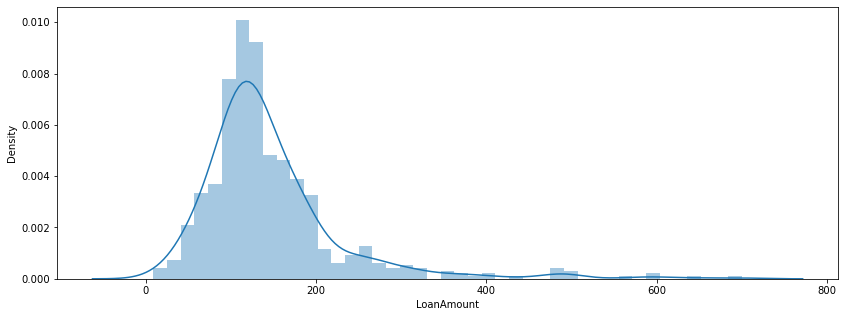

In [26]:
plt.figure(figsize=(14,5))
sns.distplot(df['LoanAmount'])
plt.show()

OBSERVATIONS:-
   1. The data is +ve skewed.
   2. From above plot we can see that averaage Loan amount availed by the applicants is b/w 130-160. Al

# Bivarate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

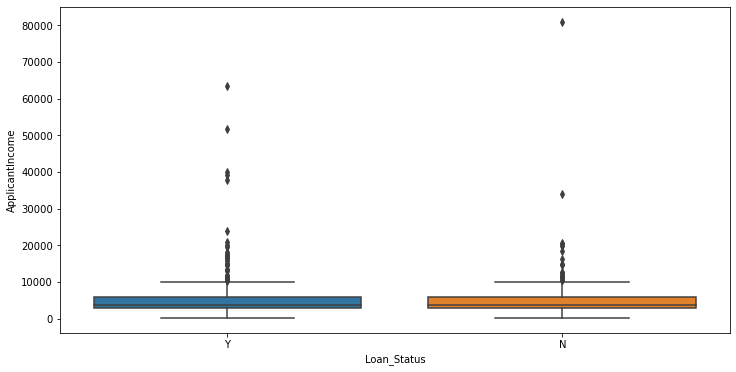

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=df)
plt.show

Mean Applicant Income for both loan approval catrgory is almost same.

<function matplotlib.pyplot.show(close=None, block=None)>

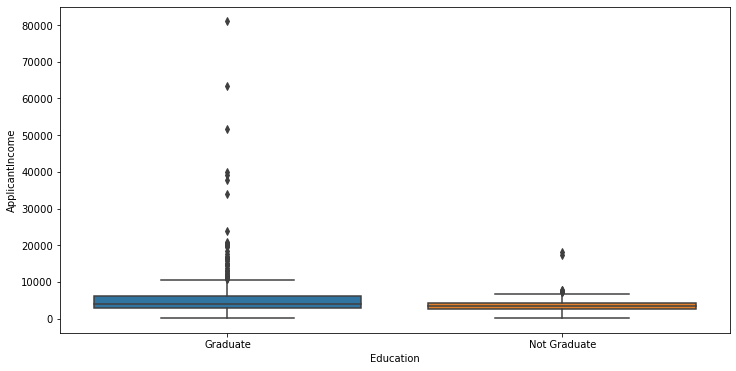

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Education',y='ApplicantIncome',data=df)
plt.show

From above we can see that the Income of People who are graduted is more than the people who are not graduated.

<function matplotlib.pyplot.show(close=None, block=None)>

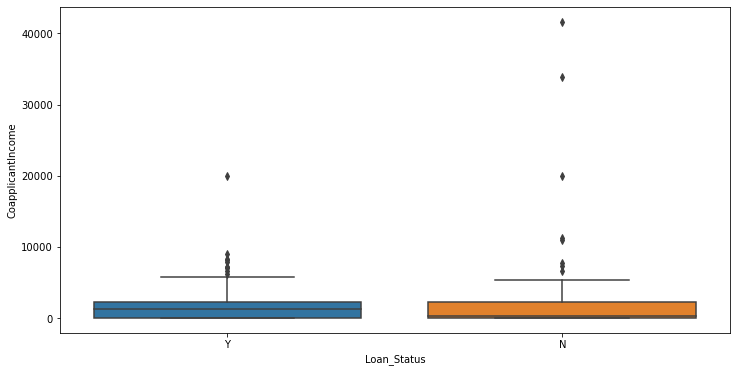

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=df)
plt.show

Here we can see that Mean of Co-Applicants Income is slighlty more for the applicants who are getting approval on the loans than the people whose loans are rejected.

<function matplotlib.pyplot.show(close=None, block=None)>

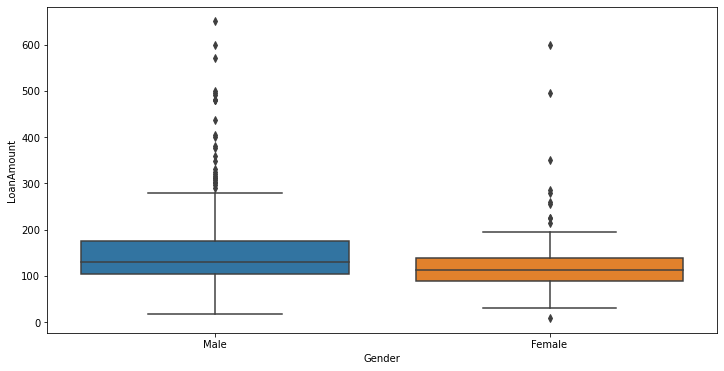

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Gender',y='LoanAmount',data=df)
plt.show

From above plot we can see that the Loan Amount requested by the Males is Higher than amount requested by the Females.

<function matplotlib.pyplot.show(close=None, block=None)>

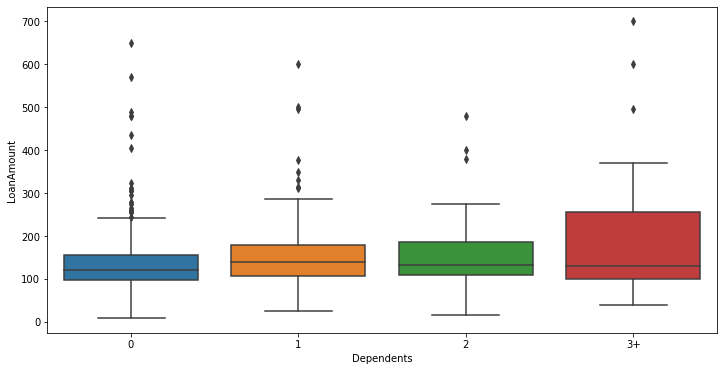

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Dependents',y='LoanAmount',data=df)
plt.show

From above we can see that the loan amount requested by the people with 3+ dependents is more than the applicants having 0 dependents.

<function matplotlib.pyplot.show(close=None, block=None)>

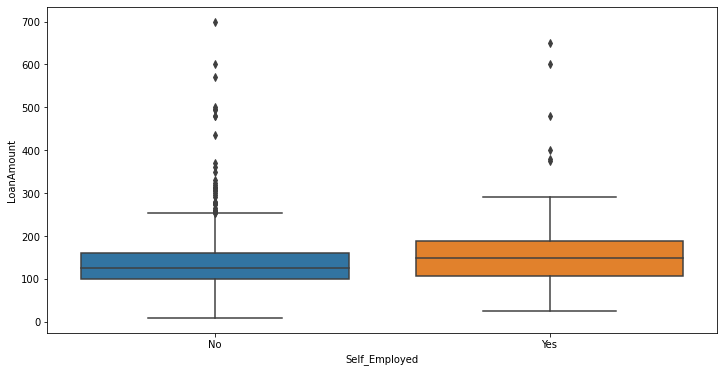

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Self_Employed',y='LoanAmount',data=df)
plt.show

Loan amount requested by the Self-Employeed people is More than the people who are not Self-Employeed.

<function matplotlib.pyplot.show(close=None, block=None)>

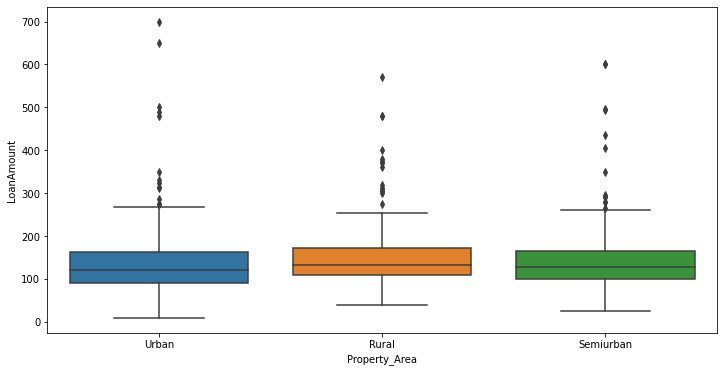

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Property_Area',y='LoanAmount',data=df)
plt.show

Loan amount requested by the People in Rural areas is more as compared to people in other areas.

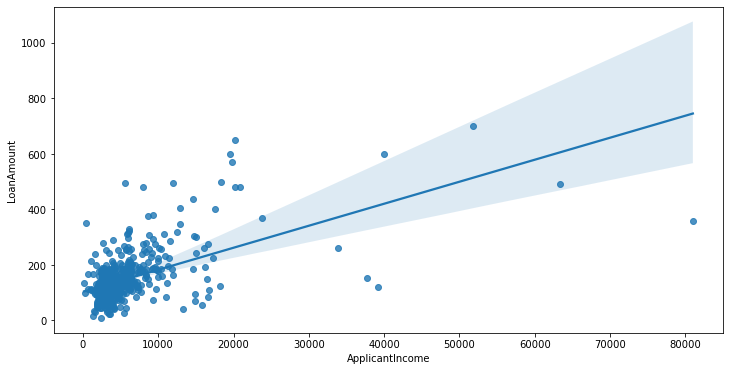

In [34]:
plt.figure(figsize=(12,6))
sns.regplot(x='ApplicantIncome',y='LoanAmount',data=df)
plt.show()

From above Plot we can see that with increase in Income of the Applicant the Loan amount requested by the applicant also increases.

# Multi-Variate Analysis

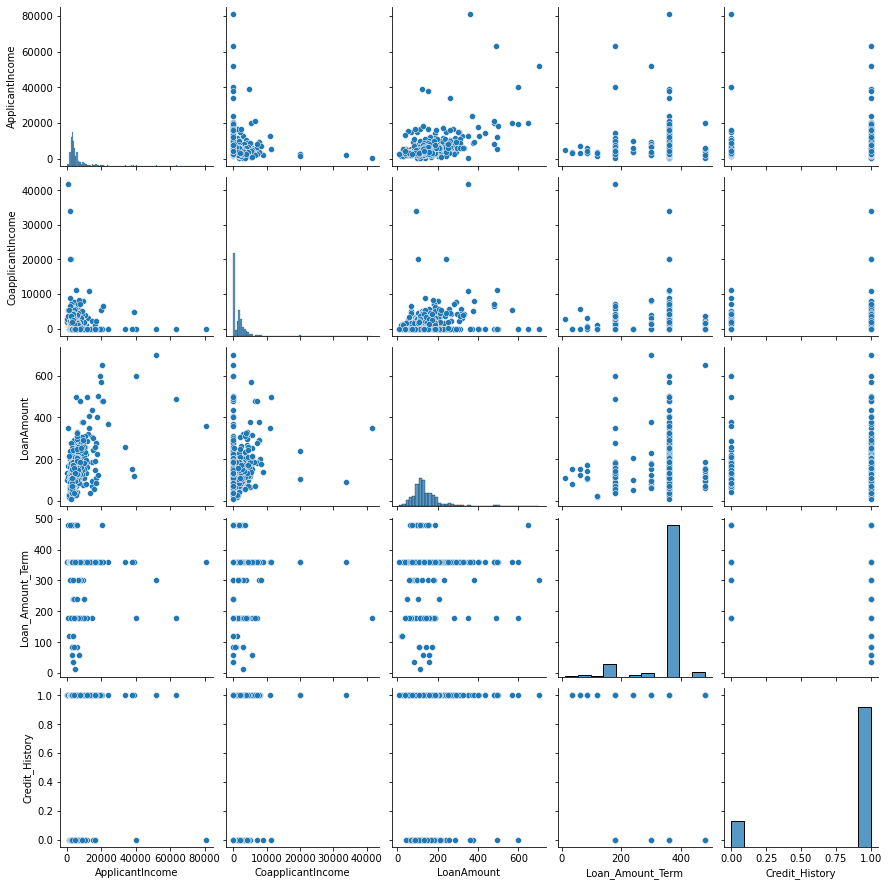

In [35]:
sns.pairplot(df)

# Treating Null Values

In [36]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see that the Null Values are present in the Data.

   1. Replacing the Null Values from Gender, Married, Dependents, Self_Employed, Loan_Amount_Term & Credit_History with MODE of the respective Columns.
   2. While replacing Null Values from LoanAmount Column with MEAN of the Column.

In [37]:
for i in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [38]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].dropna().mean())

In [39]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We can see that now the Null vaues have been removed.

# Data Preparation

In [40]:
df.drop({'Loan_ID'},axis=1,inplace=True)  # Removing Non-useful columns
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Label Encoding

Converting the Columns with String values into integer values to use these features for M.L. model.

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


Now we can see that all the Columns with String Values have been converted to Integer values using Label Encoding.

# CORRELATION

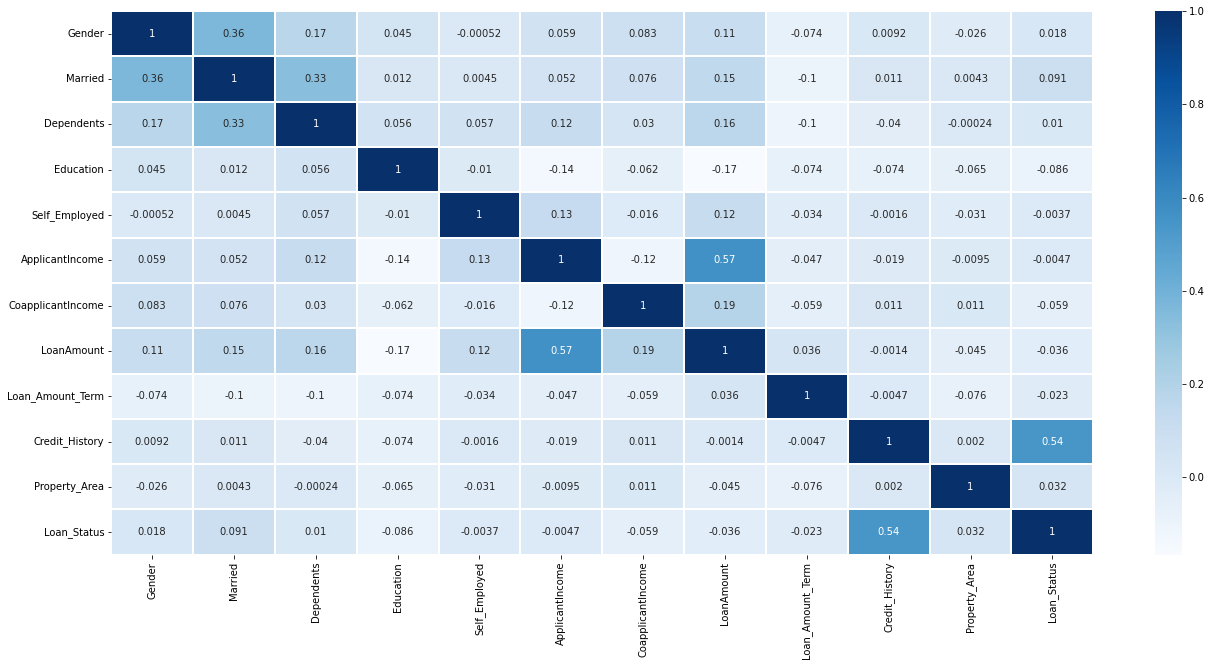

In [42]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True,linewidths = 2,cmap="Blues")
plt.show()

From above we can see that the Highest correlation exists b/w :-
   1. Loan Status & Credit History
   2. Loan Amount & Applicant Income

CORRELATION with the Loan Status Column

In [43]:
df.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

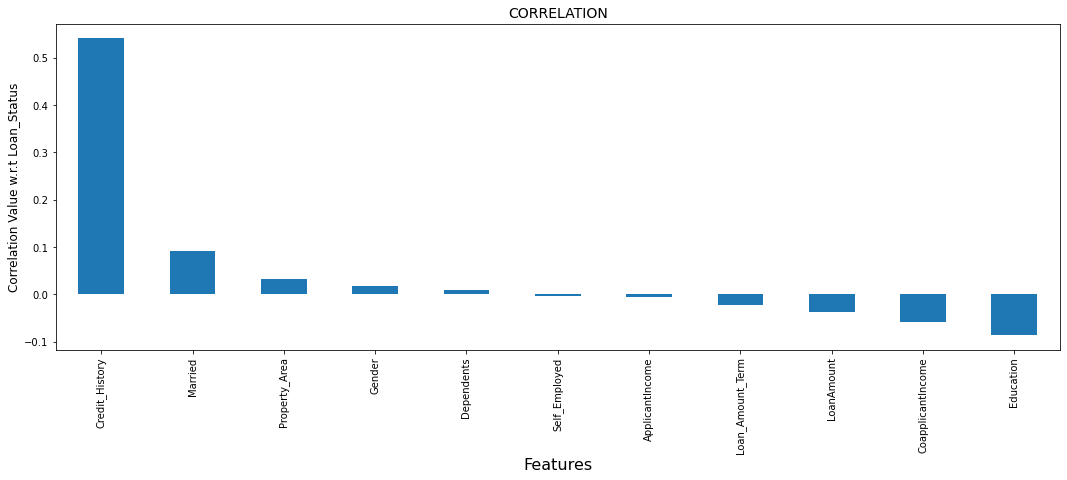

In [44]:
plt.figure(figsize=(18,6))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar')
plt.xlabel("Features",fontsize=16)
plt.ylabel("Correlation Value w.r.t Loan_Status",fontsize=12)
plt.title("CORRELATION",fontsize=14)
plt.show()

We can see that credit history shows maximum correlation with Loan_Status.

# Data Balancing

Splitting data into Target & Independent columns

In [45]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [46]:
x=df.drop({'Loan_Status'},axis=1)         # Independent Columns

y=df.iloc[:,-1]          # Target Column

In [47]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

We can see that the no. of entries for each Loan Status has big difference.Therefore, Using SMOTE to Balance the data.

In [48]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
dx,dy=sm.fit_resample(x,y)
dy

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int32

In [49]:
dy.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

Now we can see that the Data is Balanced.

In [50]:
dy = pd.DataFrame(dy)
dy

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
839,0
840,0
841,0
842,0


In [51]:
dx.shape

(844, 11)

# Treating Outliers

Removing Outliers using Z-score

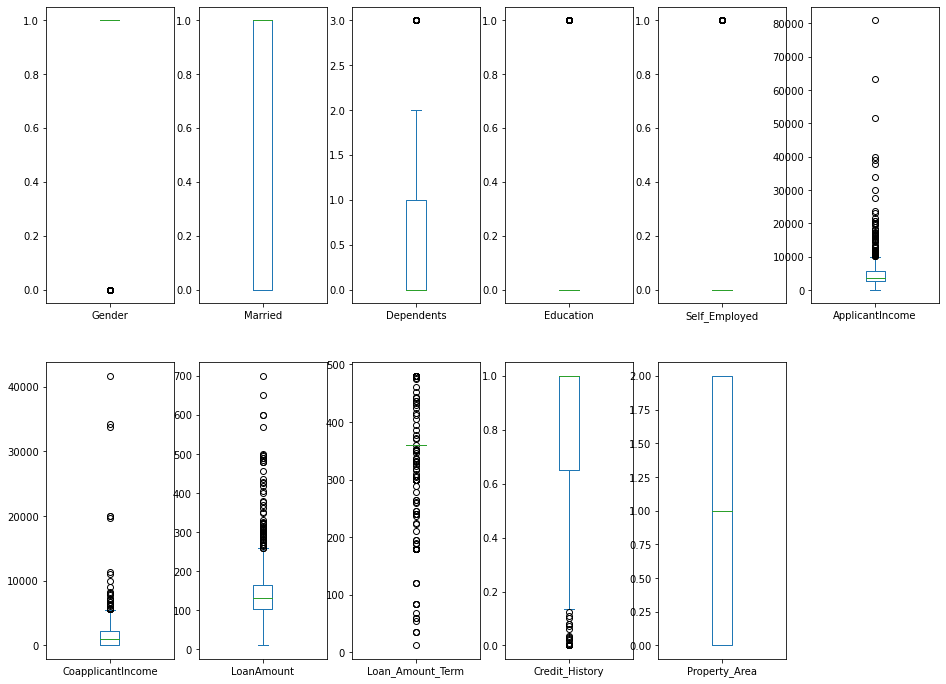

In [52]:
dx.plot(kind='box',subplots=True,layout=(2,6),figsize=(16,12)) 
plt.show()

From above boxplots we can see that outliers are present in 'ApplicantIncome','CoapplicantIncome' & 'LoanAmount' columns.

In [53]:
from scipy.stats import zscore               # Removing Outliers from independent variables
z=np.abs(zscore(dx))
z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.549972,1.131849,0.690520,0.479917,0.330253,0.100235,0.536268,0.003999,0.257389,0.582957,1.347764
1,0.549972,0.883510,0.380801,0.479917,0.330253,0.124317,0.021577,0.223123,0.257389,0.582957,1.199857
2,0.549972,0.883510,0.690520,0.479917,3.027982,0.405097,0.536268,0.987922,0.257389,0.582957,1.347764
3,0.549972,0.883510,0.690520,2.083692,0.330253,0.479061,0.268535,0.321807,0.257389,0.582957,1.347764
4,0.549972,1.131849,0.690520,0.479917,0.330253,0.127018,0.536268,0.062762,0.257389,0.582957,1.347764
...,...,...,...,...,...,...,...,...,...,...,...
839,0.549972,0.883510,0.690520,0.479917,0.330253,0.008357,0.028319,0.291379,0.670789,1.417077,0.073953
840,0.549972,1.131849,0.380801,0.479917,0.330253,0.228298,0.536268,0.056694,0.257389,1.961793,1.199857
841,0.549972,0.883510,0.380801,0.479917,0.330253,0.440749,0.115864,0.025303,0.257389,1.961793,1.199857
842,1.818275,1.131849,0.380801,0.479917,0.330253,0.120947,0.536268,0.154138,0.257389,0.454242,0.073953


In [54]:
# Now to take out the ouliers taking threshold 3
# All values with Z-score >3 will be considered as ouliers
# Making a new file for values with z-score<3

threshold=3
x2=dx[(z<3).all(axis=1)]
x2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.000000,146.412162,360.000000,1.000000,2
1,1,1,1,0,0,4583,1508.000000,128.000000,360.000000,1.000000,0
3,1,1,0,1,0,2583,2358.000000,120.000000,360.000000,1.000000,2
4,1,0,0,0,0,6000,0.000000,141.000000,360.000000,1.000000,2
6,1,1,0,1,0,2333,1516.000000,95.000000,360.000000,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,0,0,0,5331,1488.245511,169.709203,385.686559,0.214055,1
840,1,0,1,0,0,6571,0.000000,141.491924,360.000000,0.000000,0
841,1,1,1,0,0,2799,1910.689586,144.036760,360.000000,0.000000,0
842,0,0,1,0,0,4602,0.000000,133.592416,360.000000,0.592416,1


In [55]:
print(np.where(z>3)[0])

[  2   5   9  14  25  32  44  54  62  68  68  71  74  77  79  81  94 113
 126 128 130 130 133 133 137 142 151 155 155 171 171 174 177 177 183 185
 185 186 188 199 212 213 226 229 237 242 243 245 252 254 262 264 278 280
 286 308 313 313 319 325 327 333 333 334 335 337 353 364 369 370 372 383
 402 404 409 410 417 417 430 432 438 439 443 445 449 454 460 470 473 475
 478 487 488 493 495 497 498 506 508 522 523 523 525 525 534 546 550 557
 561 561 563 575 581 585 589 591 592 594 596 598 600 604 613 618 645 645
 655 670 680 706 717 728 731 761 783 785 798 819]


In [56]:
y2= dy.drop(np.where(z>3)[0],axis=0)     # Dropping the rows from same locations from target varibles
y2

,Loan_Status
0,1
1,0
3,1
4,1
6,1
...,...
839,0
840,0
841,0
842,0


In [57]:
x2.shape

(720, 11)

# Treating Skewness

In [58]:
x2.skew().sort_values(ascending=False)

ApplicantIncome      2.228236
Education            1.569959
CoapplicantIncome    1.324419
Dependents           1.288314
LoanAmount           1.030224
Property_Area        0.108174
Self_Employed        0.000000
Married             -0.195778
Credit_History      -1.174523
Gender              -1.218319
Loan_Amount_Term    -1.945500
dtype: float64

Taking skewness threshold +/-0.5. We can see that Skeness is present in continuous columns i.e. ApplicantIncome, CoapplicantIncome & LoanAmount.

Removing Skewness from these columns.

In [59]:
from scipy.stats import boxcox
x2['ApplicantIncome']=boxcox(x2['ApplicantIncome'],0)
x2.skew()

Gender              -1.218319
Married             -0.195778
Dependents           1.288314
Education            1.569959
Self_Employed        0.000000
ApplicantIncome     -0.090374
CoapplicantIncome    1.324419
LoanAmount           1.030224
Loan_Amount_Term    -1.945500
Credit_History      -1.174523
Property_Area        0.108174
dtype: float64

In [60]:
x2['CoapplicantIncome']=np.sqrt(x2['CoapplicantIncome'])
x2['LoanAmount']=np.sqrt(x2['LoanAmount'])
x2.skew()

Gender              -1.218319
Married             -0.195778
Dependents           1.288314
Education            1.569959
Self_Employed        0.000000
ApplicantIncome     -0.090374
CoapplicantIncome    0.201103
LoanAmount           0.270739
Loan_Amount_Term    -1.945500
Credit_History      -1.174523
Property_Area        0.108174
dtype: float64

We can see that the skewness has been reduced now.

# Treating Multicollinearity

Checking Variance Inflation Factor(VIF)

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [64]:
calc_vif(x2)

,Variables,VIF FACTOR
0,Gender,5.368699
1,Married,3.161349
2,Dependents,1.686803
3,Education,1.277133
4,Self_Employed,NaN
5,ApplicantIncome,90.143903
6,CoapplicantIncome,2.838104
7,LoanAmount,41.098768
8,Loan_Amount_Term,42.286895
9,Credit_History,4.639070


We can see that ApplicantIncome column has the highest V.I.F. Factor. So removing it.

In [65]:
x2.drop({'ApplicantIncome'},axis=1,inplace=True)          
calc_vif(x2)

,Variables,VIF FACTOR
0,Gender,5.154484
1,Married,3.158158
2,Dependents,1.683997
3,Education,1.262546
4,Self_Employed,NaN
5,CoapplicantIncome,2.629169
6,LoanAmount,23.553691
7,Loan_Amount_Term,21.076037
8,Credit_History,4.521333
9,Property_Area,2.391250


We can see that LoanAmount & Loan_Amount_Term have highest V.I.F. close to each other. But dropping Loan_Amount_Term columns as it shows less correlation with the Target variable.

In [66]:
x2.drop({'Loan_Amount_Term'},axis=1,inplace=True)          
calc_vif(x2)

,Variables,VIF FACTOR
0,Gender,5.144699
1,Married,3.150237
2,Dependents,1.675576
3,Education,1.250953
4,Self_Employed,NaN
5,CoapplicantIncome,2.598146
6,LoanAmount,8.534938
7,Credit_History,4.260011
8,Property_Area,2.266106


We can see that now the V.I.F. values have been reduced & all values are below 10.

# Data Scaling

In [68]:
x2.describe()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
count,720.000000,720.000000,720.000000,720.000000,720.0,720.000000,720.000000,720.000000,720.000000
mean,0.759722,0.548611,0.602778,0.191667,0.0,26.787764,11.360738,0.754577,0.938889
std,0.427549,0.497977,0.910757,0.393886,0.0,25.698279,2.286081,0.400229,0.786987
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,10.007266,0.543825,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.0,35.749992,11.267329,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.0,46.825596,12.544364,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,0.0,94.762862,18.165902,1.000000,2.000000


From above we can see that all the Columns are almost in same scale. Therefore not scaling the data.

# Splitting the Data

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

Finding out the best Random State Value.

In [73]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test= train_test_split(x2,y2,random_state=i,test_size=0.22)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    if round(accuracy_score(y_test,pred_test)*100,1) > 85.0:
        print("At random state",i,"The model preforms very well")
        print("Model Accuracy score is :-",accuracy_score(y_test,pred_test)*100,'\n')

At random state 194 The model preforms very well
Model Accuracy score is :- 85.53459119496856 

At random state 463 The model preforms very well
Model Accuracy score is :- 85.53459119496856 

At random state 782 The model preforms very well
Model Accuracy score is :- 87.42138364779875 

At random state 842 The model preforms very well
Model Accuracy score is :- 86.79245283018868 

At random state 858 The model preforms very well
Model Accuracy score is :- 85.53459119496856 

At random state 915 The model preforms very well
Model Accuracy score is :- 85.53459119496856 



From above we can see that Model is performing best at Random State = 782. Beacuse for random state=782 Model's accuracy score is highest

Therefore, using Random State = 782 for further working & Splitting the DataFrame.

In [74]:
x_train,x_test,y_train,y_test= train_test_split(x2,y2,random_state=782,test_size=0.22)

In [75]:
x_train.shape

(561, 9)

In [76]:
y_train.shape

(561, 1)

In [77]:
x_test.shape

(159, 9)

In [78]:
y_test.shape

(159, 1)

# Testing with Different Models

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [80]:
lg = LogisticRegression()
gn = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()

model = [lg,gn,knn,svc,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred_test=m.predict(x_test)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))
    print('\n')

Accuracy Score of LogisticRegression() is: 0.8742138364779874
[[66 10]
 [10 73]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        76
           1       0.88      0.88      0.88        83

    accuracy                           0.87       159
   macro avg       0.87      0.87      0.87       159
weighted avg       0.87      0.87      0.87       159



Accuracy Score of GaussianNB() is: 0.8553459119496856
[[55 21]
 [ 2 81]]
              precision    recall  f1-score   support

           0       0.96      0.72      0.83        76
           1       0.79      0.98      0.88        83

    accuracy                           0.86       159
   macro avg       0.88      0.85      0.85       159
weighted avg       0.88      0.86      0.85       159



Accuracy Score of KNeighborsClassifier() is: 0.7421383647798742
[[59 17]
 [24 59]]
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       

From above we can see that among all the algorithms LogisticRegression() & GaussianNB() are working well with the data. While LogisticRegression() is obtaining the highest accuracy score among all.

# Ensemble Techniques

Using various Bagging & Boosting Ensemble methods to train the data to increase the model performance.

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
rf = RandomForestClassifier()
bg = BaggingClassifier()
ad = AdaBoostClassifier()
gb = GradientBoostingClassifier()

model = [rf,bg,ad,gb]

for m in model:
    m.fit(x_train,y_train)
    pred_test=m.predict(x_test)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))
    print('\n')

Accuracy Score of RandomForestClassifier() is: 0.8616352201257862
[[63 13]
 [ 9 74]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        76
           1       0.85      0.89      0.87        83

    accuracy                           0.86       159
   macro avg       0.86      0.86      0.86       159
weighted avg       0.86      0.86      0.86       159



Accuracy Score of BaggingClassifier() is: 0.8050314465408805
[[66 10]
 [21 62]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        76
           1       0.86      0.75      0.80        83

    accuracy                           0.81       159
   macro avg       0.81      0.81      0.80       159
weighted avg       0.81      0.81      0.80       159



Accuracy Score of AdaBoostClassifier() is: 0.8301886792452831
[[59 17]
 [10 73]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.

From above we can see that out of all Ensemble Methods RandomForestClassifier() & GradientBoostingClassifier() are working well with the data. While RandomForestClassifier() is obtaining the highest accuracy.

# Gradient Descent Algorithm

In [83]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()

In [84]:
sgd.fit(x_train,y_train)
pred_test=sgd.predict(x_test)
print('Accuracy Score of',sgd,'is:',accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

Accuracy Score of SGDClassifier() is: 0.7547169811320755
[[49 27]
 [12 71]]
              precision    recall  f1-score   support

           0       0.80      0.64      0.72        76
           1       0.72      0.86      0.78        83

    accuracy                           0.75       159
   macro avg       0.76      0.75      0.75       159
weighted avg       0.76      0.75      0.75       159



We can see that SGDClassifier() is not performing well as compared to the other Algorithms.

# Cross-Validation of Algorithms

Checking cross_val_scores for all the Algorithms that are performing well to know the which Algorithm is actually working best for the the Model.

In [86]:
from sklearn.model_selection import cross_val_score
model = [lg,gn,rf,gb]

for m in model:
    pred_test=m.predict(x_test)
    score = cross_val_score(m,x2,y2,cv=5)
    c_score = score.mean()
    print("For",m,"Cross Validation score is:-",c_score*100)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,pred_test)*100)
    print("\n")

For LogisticRegression() Cross Validation score is:- 77.63888888888889
Accuracy Score of LogisticRegression() is: 87.42138364779875


For GaussianNB() Cross Validation score is:- 76.66666666666669
Accuracy Score of GaussianNB() is: 85.53459119496856


For RandomForestClassifier() Cross Validation score is:- 79.58333333333334
Accuracy Score of RandomForestClassifier() is: 86.16352201257862


For GradientBoostingClassifier() Cross Validation score is:- 79.44444444444444
Accuracy Score of GradientBoostingClassifier() is: 84.27672955974843




Now from above we can confirm that RandomForestClassifier() is working Best for the data as:-

   1. Cross Val-Score is highest is case of RandomForestClassifier().
   2. Cross Val-Score & Accuracy score are closest in case of RandomForestClassifier()
   
Therefore, Using RandomForestClassifier() as the Final Algorithm & Optimisaztion.

# Hyperparameter tuning

Using GridSearchCV for further Model optimization.

In [87]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()

In [88]:
grid_param = {'n_estimators':[50,100,200,300],'criterion':['gini','entropy'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[5,6,7,8,9]}

gd_sr = GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x_train,y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [89]:
best_result = gd_sr.best_score_
print(best_result)

0.7932522123893806


In [90]:
gd_sr.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200)

Using these above parameters for Final training of the Model.

In [91]:
rf = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200)

In [92]:
rf.fit(x_train,y_train)
pred_test=rf.predict(x_test)
print('Accuracy Score of',rf,'is:',accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

Accuracy Score of RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200) is: 0.8679245283018868
[[62 14]
 [ 7 76]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        76
           1       0.84      0.92      0.88        83

    accuracy                           0.87       159
   macro avg       0.87      0.87      0.87       159
weighted avg       0.87      0.87      0.87       159



We can see that the Accuracy score has been increased after Hyperparameter Tuning. Using above model for final Cross-validation.

# Cross-Validation of Best Model

In [93]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    score = cross_val_score(rf,x2,y2,cv=i)
    c_score = score.mean()
    print("At cv:-",i)
    print("Cross Validation score is:-",c_score*100)
    print("Accuracy Score of model is :-",accuracy_score(y_test,pred_test)*100)
    print("\n")

At cv:- 2
Cross Validation score is:- 77.36111111111111
Accuracy Score of model is :- 86.79245283018868


At cv:- 3
Cross Validation score is:- 80.41666666666667
Accuracy Score of model is :- 86.79245283018868


At cv:- 4
Cross Validation score is:- 79.72222222222223
Accuracy Score of model is :- 86.79245283018868


At cv:- 5
Cross Validation score is:- 80.13888888888889
Accuracy Score of model is :- 86.79245283018868


At cv:- 6
Cross Validation score is:- 80.55555555555554
Accuracy Score of model is :- 86.79245283018868


At cv:- 7
Cross Validation score is:- 80.98637513257731
Accuracy Score of model is :- 86.79245283018868


At cv:- 8
Cross Validation score is:- 81.25
Accuracy Score of model is :- 86.79245283018868


At cv:- 9
Cross Validation score is:- 80.69444444444444
Accuracy Score of model is :- 86.79245283018868




Accuracy score is closest to Cross Val Score at cv = 8. So, Using cv=8 for final Model validation.

In [96]:
rf.fit(x_train,y_train)
pred_test=rf.predict(x_test)
score = cross_val_score(rf,x2,y2,cv=8)
c_score = score.mean()
print("For",rf,"Cross Validation score is:-",c_score*100)
print('Accuracy Score of',rf,'is:',accuracy_score(y_test,pred_test)*100)

For RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200) Cross Validation score is:- 81.66666666666667
Accuracy Score of RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200) is: 85.53459119496856


We can see that the Cross Validation Score is very close to Accuracy Score. Hence we are heading towards a good approach and there is no overfitting/underfitting.

# AUC ROC Curve

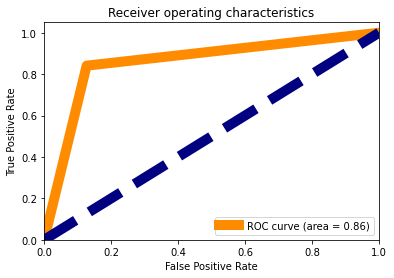

In [97]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test,y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

From above we can confirm that are Model is performing Well as the Area Under the Curve is Almost 86%.

# Saving the best Model

In [98]:
import pickle

filename = 'Loan Status Prediction.pkl'

pickle.dump(rf, open(filename,'wb')) 

# Conclusion

In [99]:
loaded_model = pickle.load(open('Loan Status Prediction.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8553459119496856


In [100]:
original=np.array(y_test).reshape(-1)
predicted=np.array(loaded_model.predict(x_test)).reshape(-1)
conclusion = pd.DataFrame({"Original":original,"Predicted":predicted}, index= range(len(original)))
conclusion

,Original,Predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,0,1
...,...,...
154,0,1
155,1,1
156,0,0
157,0,0


From above we can see that almost all predicted & original values are matching. Hence our model is performing good.